# Kapitel 7: Datenaufbereitung - Säubern und Transformieren

McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. 2. Auflage. Sebastopol, CA [u. a.]: O’Reilly.

Überarbeitet: armin.baenziger@zhaw.ch, 30. Juli 2021

- Bei der Datenanalyse macht das Aufbereiten der Daten oft einen erheblichen Teil des Zeitaufwands aus.
- In diesem Kapitel behandlen wir Werkzeuge für fehlende Werte, doppelte Werte, String-Manipulationen und einige andere analytische Datentransformationen. 
- Im nächsten Kapitel konzentrieren wir uns darauf, Datensätze auf verschiedene Arten zu kombinieren und neu anzuordnen.

In [ ]:
%autosave 0

In [2]:
# Wichtige Bibliotheken mit üblichen Abkürzungen laden:
import numpy as np
import pandas as pd
import matplotlib.pyplot

%matplotlib inline

## Behandlung fehlender Daten
- Fehlende Werte treten häufig in Datensätzen auf. 
- Eines der Ziele von Pandas ist es, das Arbeiten mit Fehlwerten so einfach wie möglich zu gestalten. 
- *Zum Beispiel schliessen alle deskriptiven Statistiken zu Pandas-Objekten standardmässig fehlende Werte aus.*

In [3]:
# Series mit Fehlwert generieren:
ser = pd.Series([1.4e6, 2.5e6, np.nan, -1.3e5])
ser

0    1400000.0
1    2500000.0
2          NaN
3    -130000.0
dtype: float64

In [4]:
# Welche Werte sind NaN?
ser.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
ser.sum()  
# Fehlwerte werden ausgeschlossen. sum() funktioniert.

3770000.0

### Fehlwerte filtern
Wie können wir Fehlwerte filtern?
- Erste Möglichkeit:

In [6]:
# Nur Werte wählen, für die Elemente in ser nicht NaN sind:
ser[ser.notnull()]

0    1400000.0
1    2500000.0
3    -130000.0
dtype: float64

- Zweite Möglichkeit: Methode `dropna()` verwenden

In [7]:
ser.dropna()    # einfachere Variante

0    1400000.0
1    2500000.0
3    -130000.0
dtype: float64

- Mit DataFrame-Objekten sind die Dinge etwas komplexer. 
- Möglicherweise möchten man Zeilen oder Spalten löschen, bei denen mindestens ein NA auftritt oder nur diejenigen, bei denen alle Felder NAs enthalten. 
- `dropna` löscht standardmässig jede Zeile, die *mindestens einen* fehlenden Wert enthält:

In [8]:
# Pythons None ist auch NaN:
df = pd.DataFrame({'A': [1.0, 2.1, None, None], 
                   'B': [6.5, None, None, 3.2],
                   'C': [8.7, None, None, 0.5]})
df

,A,B,C
0,1.0,6.5,8.7
1,2.1,NaN,NaN
2,NaN,NaN,NaN
3,NaN,3.2,0.5


In [9]:
df.dropna(how='any')  # Wenn mind. ein Wert in einer Zeile NaN ist, 
                      # wird sie weggelassen.

,A,B,C
0,1.0,6.5,8.7


In [10]:
df.dropna()  # 'any' ist der Default und kann somit weggelassen werden.

,A,B,C
0,1.0,6.5,8.7


In [11]:
df.dropna(how='all') # Nur Zeilen weglassen, bei denen alle Werte NaN sind.

,A,B,C
0,1.0,6.5,8.7
1,2.1,NaN,NaN
3,NaN,3.2,0.5


**Kontrollfragen:**

In [12]:
# Gegeben:
df

,A,B,C
0,1.0,6.5,8.7
1,2.1,NaN,NaN
2,NaN,NaN,NaN
3,NaN,3.2,0.5


In [15]:
# Frage 1: Was ist der Output?
df.isnull().sum()

A    2
B    2
C    2
dtype: int64

In [22]:
# Frage 2: Was ist der Output?
df.loc[df.B.dropna().index]

,A,B,C
0,1.0,6.5,8.7
3,NaN,3.2,0.5


### Fehlende Daten mit Füllwerten besetzen

In [23]:
# Ausgangslage:
df

,A,B,C
0,1.0,6.5,8.7
1,2.1,NaN,NaN
2,NaN,NaN,NaN
3,NaN,3.2,0.5


In [24]:
df.sum()   # Fehlwerte werden nicht berücksichtigt.

A    3.1
B    9.7
C    9.2
dtype: float64

In [25]:
df.cumsum()    # kumulierte Summen

,A,B,C
0,1.0,6.5,8.7
1,3.1,NaN,NaN
2,NaN,NaN,NaN
3,NaN,9.7,9.2


In [26]:
df.fillna(0) # Fehlwerte durch 0 ersetzen

,A,B,C
0,1.0,6.5,8.7
1,2.1,0.0,0.0
2,0.0,0.0,0.0
3,0.0,3.2,0.5


In [27]:
df.fillna(0).cumsum()  
# Vergleichen mit df.cumsum() oben!

,A,B,C
0,1.0,6.5,8.7
1,3.1,6.5,8.7
2,3.1,6.5,8.7
3,3.1,9.7,9.2


`fillna` gibt ein *neues* Objekt zurück, aber man kann das vorhandene Objekt auch direkt bzw. permanent verändern:  
Dazu müsste man `fillna(0, inplace=True)` schreiben.

Fehlwerte können auch mit berechneten Grössen ersetzt werden:

In [28]:
df.fillna(df.median())  # NaN mit Median füllen.

,A,B,C
0,1.00,6.50,8.7
1,2.10,4.85,4.6
2,1.55,4.85,4.6
3,1.55,3.20,0.5


Wiederum müsste man das Argument `inplace=True` verwenden, um das Objekt *permanent* zu verändern.

**Kontrollfragen:**

In [29]:
# Gegeben:
np.random.seed(37)
daten = np.random.choice([1, 2, np.nan], (4, 3))
df = pd.DataFrame(daten, columns=list('XYZ'),
                         index=list('abcd'))
df

,X,Y,Z
a,1.0,1.0,2.0
b,NaN,NaN,NaN
c,2.0,1.0,2.0
d,NaN,1.0,1.0


In [30]:
# Frage 1: Was ist der Output?
df.dropna()

,X,Y,Z
a,1.0,1.0,2.0
c,2.0,1.0,2.0


In [31]:
# Frage 2: Was ist der Output?
df.dropna(how='all')

,X,Y,Z
a,1.0,1.0,2.0
c,2.0,1.0,2.0
d,NaN,1.0,1.0


In [34]:
# Frage 3: Was ist der Output?
df.sum()

X    3.0
Y    3.0
Z    5.0
dtype: float64

In [35]:
# Frage 4: Was ist der Output?
df.fillna(df.median()).sum()

X    6.0
Y    4.0
Z    7.0
dtype: float64

Statt Fälle (Zeilen), kann man auch Variablen (Spalten) weglassen, die NaN enthalten. Im folgenden Beispiel werden Spalten (`axis=1`) weggelassen, welche mindestens 3 (`thresh=3`) *nicht*-NaN-Werte enthalten.

In [41]:
df.dropna(thresh=3, axis=1)

,Y,Z
a,1.0,2.0
b,NaN,NaN
c,1.0,2.0
d,1.0,1.0


**Kontrollfragen:**

In [42]:
# Gegeben:
df.loc['b', 'Y'] = 2
df

,X,Y,Z
a,1.0,1.0,2.0
b,NaN,2.0,NaN
c,2.0,1.0,2.0
d,NaN,1.0,1.0


In [ ]:
# Frage 1: Was ist der Output?
df.dropna(axis=1)

In [ ]:
# Frage 2: Was ist der Output?
df.dropna()

In [58]:
df.loc[['a', 'b'], 'X']

a    1.0
b    NaN
Name: X, dtype: float64

## Daten-Transformation

### Entfernen von Duplikaten 
Doppelte Zeilen können aus verschiedenen Gründen in einem Dataframe gefunden werden.  
Der folgende Datensatz ist ein Beispiel:

In [61]:
df2 = pd.DataFrame({'Vorname' : ['Anna', 'Anna', 'Ken', 'Anna', 'Peter'],
                    'Nachname': ['Aboli', 'Meier', 'Smith', 'Meier', 'Muster']})
df2

,Vorname,Nachname
0,Anna,Aboli
1,Anna,Meier
2,Ken,Smith
3,Anna,Meier
4,Peter,Muster


Beachten Sie, dass lediglich die Zeilen mit Index 1 und 3 identisch sind (`Vorname` und `Nachname` sind gleich).

In [62]:
df2.duplicated()  
# Genau eine Zeile ist zweimal vorhanden!

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [63]:
df2.drop_duplicates()  # Duplikate löschen, mit inplace=True dauerhaft

,Vorname,Nachname
0,Anna,Aboli
1,Anna,Meier
2,Ken,Smith
4,Peter,Muster


Man kann auch nur in einer Teilmenge der Spalten Duplikate aufspüren:

In [64]:
df2.drop_duplicates(['Vorname'])  # Nur noch die erste "Anna"

,Vorname,Nachname
0,Anna,Aboli
2,Ken,Smith
4,Peter,Muster


### Ersetzen von Werten
- Das Ausfüllen fehlender Daten mit der `fillna`-Methode ist ein Sonderfall eines allgemeineren Ersatzwerts. 
- Die Methode `map` kann verwendet werden, um eine Teilmenge von Werten in einem Objekt zu ändern (siehe Lehrmittel). 
- `replace` bietet eine *einfachere und flexiblere Möglichkeit*, dies zu tun. 
- Betrachten wir hierzu eine Series:

In [65]:
ser = pd.Series([1., -99., 2., -99., -999., 3.])
ser

0      1.0
1    -99.0
2      2.0
3    -99.0
4   -999.0
5      3.0
dtype: float64

In [66]:
ser.replace(-99, np.nan)    # -99 mit NaN ersetzen

0      1.0
1      NaN
2      2.0
3      NaN
4   -999.0
5      3.0
dtype: float64

In [67]:
ser.replace([-99, -999], np.nan)   # -99 und -999 mit NaN ersetzen

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [68]:
ser.replace([-99, -999], [np.nan, 0])  # -99 mit NaN und -999 mit 0 ersetzen.

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [69]:
# Statt mit Listen mit Dicts (noch etwas übersichtlicher):
ser.replace({-99: np.nan, -999: 0})   

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [70]:
# Nun ein Beispiel mit einem DataFrame:
ratings = pd.DataFrame({'Fitch': ['A', 'AA+', 'A', 'A-'],
                        'S&P': ['A-', 'AA+', 'A', 'BBB+'],
                        'Moody\'s': ['A2', 'Aa2', 'A3', 'Baa1'],
                        'Rendite': [3.5, 3, 3.3, 4.1]},
                        index=['a', 'b', 'c', 'd'])
ratings.index.name = 'Asset'
ratings.columns.name = 'Rating Agentur'
ratings

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A,A,A3,3.3
d,A-,BBB+,Baa1,4.1


In [71]:
ratings.replace('A', 'A-')   # Achtung, in allen Spalten verändert.

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A-,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A-,A-,A3,3.3
d,A-,BBB+,Baa1,4.1


In [72]:
# Ersetze bei Fitch A mit A+ (permanent):
ratings['Fitch'].replace('A', 'A+', inplace=True)  
ratings

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


**Kontrollfrage:**

In [73]:
# Gegeben:
staedte = pd.Series(['Basel', 'Chur', 'Zug'])
staedte

0    Basel
1     Chur
2      Zug
dtype: object

In [74]:
# Frage: Was ist der Output?
staedte.replace({'Basel': 'Biel', 'Zug': 'Zürich'})

0      Biel
1      Chur
2    Zürich
dtype: object

### Achsenindex umbenennen
Wie Werte in einer Serie können Achsenbeschriftungen (Labels) in ähnlicher Weise durch eine Funktion/Mapping transformiert werden, um neue, unterschiedlich markierte Objekte zu erzeugen.

In [75]:
# Beispieldaten:
ratings

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


#### Die `rename`-Methode

In [76]:
# Variablennamen mit Grossbuchstaben:
ratings.rename(columns=str.upper)
# nur mit inplace=True permanent!

Rating Agentur,FITCH,S&P,MOODY'S,RENDITE
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


In [77]:
# Indexnamen ändern:
ratings.rename(index={'a': 'Wells 5.95 01.12.86', 
                      'b': 'Austria 1.5 02.11.86'})
# nur mit inplace=True permanent!

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
Wells 5.95 01.12.86,A+,A-,A2,3.5
Austria 1.5 02.11.86,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


In [78]:
# Variablennamen ändern:
ratings.rename(columns={'S&P': 'Standard & Poor'})

Rating Agentur,Fitch,Standard & Poor,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


***Kontrollfrage:***

In [89]:
# Ändern Sie den Indexnamen "c" im DataFrame "ratings" in 
# "Italy 4.75 28.05.63".
ratings.rename(index={'c': "Italy 4.75 28.05.63"})

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
Italy 4.75 28.05.63,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


### Diskretisierung und Klassierung
Kontinuierliche Daten werden oft diskretisiert oder auf andere Weise in "Bins" (Klassen) zur Analyse getrennt. Angenommen, Sie haben Daten über eine Gruppe von Personen in einer Studie und möchten diese in diskrete Altersgruppen gruppieren:

In [90]:
alter = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [91]:
klassen = [18, 25, 35, 60, 100]
alter_klassiert = pd.cut(alter, klassen)
alter_klassiert
# Erster Wert (20) in Klasse (18, 25], zweiter Wert (22) in (18, 25] usw.

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [92]:
# Klassierte Häufigkeitsverteilung:
alter_klassiert.value_counts()    

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

Es ist möglich, die Klassen zu benennen:

In [93]:
alter_klassiert = pd.cut(alter, klassen, 
                       labels = ['Jugentliche', 'junge Erwarchsene', 
                                 'mittleres Lebensalter', 'Senioren'])
alter_klassiert.value_counts()

Jugentliche              5
junge Erwarchsene        3
mittleres Lebensalter    3
Senioren                 1
dtype: int64

**Exkurs:** Die eng verwandte Funktion `qcut` teilt die Werte anhand von Quantilen ein.

In [94]:
alters_gruppen = pd.qcut(alter, 4)  # in Quartile einteilen
alters_gruppen.value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

**Kontrollfrage:**

In [95]:
# Gegeben:
np.random.seed(3)
x = np.random.randint(1,11,10)
sorted(x)

[1, 4, 4, 6, 9, 9, 9, 10, 10, 10]

In [96]:
# Was ist der Output?
klassiert = pd.cut(x, [0, 5, 7, 10])
klassiert.value_counts()

(0, 5]     3
(5, 7]     1
(7, 10]    6
dtype: int64

### Aussergewöhnliche Werte erkennen und filtern

In [97]:
# Beispieldaten:
np.random.seed(242)
n = 1000 # Anzahl Zeilen
data = pd.DataFrame({'V1': np.random.randn(n),
                     'V2': np.random.randint(0,2,n)})
data.head()

,V1,V2
0,-0.357519,1
1,0.148448,0
2,0.993531,1
3,1.838968,1
4,-0.744026,0


In [98]:
data.describe()   # Deskriptive Statistiken

,V1,V2
count,1000.000000,1000.000000
mean,0.005645,0.512000
std,1.008039,0.500106
min,-3.654168,0.000000
25%,-0.694267,0.000000
50%,-0.001319,1.000000
75%,0.721658,1.000000
max,3.057235,1.000000


In [99]:
# Zeilen, wo Beträge in Spalte V1 grösser als 3 sind:
data[np.abs(data.V1) > 3]

,V1,V2
126,-3.195871,1
494,-3.100890,0
966,-3.654168,0
979,3.057235,1
985,-3.239519,1


### Zufallsauswahlen
Zufallsauswahlen sind in verschiedenen Anwendungen wichtig. Z. B. teilt man im maschinellen Lernen die Daten zufällig in ein Trainigs- und Test-Set auf. Oder man nutzt Zufallsauswahlen bei Monte-Carlo-Simulationen.

In [100]:
ser = pd.Series(range(6))+1
ser   # z. B. Würfelaugen

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

Um eine zufällige Teilmenge (mit und ohne Zurücklegen) auszuwählen, kann die `sample`-Methode für Series und DataFrames verwendet werden:

In [101]:
# Bei Series:
np.random.seed(11)
ser.sample(n=5, replace=True)    # mit Zurücklegen

1    2
0    1
3    4
1    2
5    6
dtype: int64

In [102]:
# Man kann den Seed auch direkt der Methode sample übergeben:
ser.sample(n=5, replace=True, random_state=11)

1    2
0    1
3    4
1    2
5    6
dtype: int64

In [104]:
# Bei 6000 Würfen liegen je etwa 1000 Ausprägungen vor:
ser.sample(n=6000, replace=True).value_counts(sort=False)

5     973
4     994
2    1033
6     973
3    1030
1     997
dtype: int64

Bei DataFrames weden ganze Zeilen zufällig gezogen.

In [105]:
# Zur Erinnerung:
ratings

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
c,A+,A,A3,3.3
d,A-,BBB+,Baa1,4.1


In [106]:
# Ziehen ohne Zurücklegen:
np.random.seed(1221)
ratings.sample(n=2, replace=False)  
# replace = False ist der Default und kann weggelassen werden.

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
d,A-,BBB+,Baa1,4.1
c,A+,A,A3,3.3


In [107]:
# Ziehen mit Zurücklegen:
np.random.seed(331)
ratings.sample(n=4, replace=True)  # Ziehen mit Zurücklegen

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
b,AA+,AA+,Aa2,3.0
a,A+,A-,A2,3.5
c,A+,A,A3,3.3


In [108]:
# Nicht Anzahl sondern Anteil, welcher gesampelt wird (hier 50%):
np.random.seed(7)
ratings.sample(frac=0.5)   # 50% der Daten ziehen (ohne Zurücklegen)

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
c,A+,A,A3,3.3
b,AA+,AA+,Aa2,3.0


Manchmal möchte man den Datensatz zufällig aufteilen. Z. B. möchte man für die Modellfindung (beim maschinellen Lernen) ein Trainings- und ein Testset erstellen. Eine mögliche Lösung wäre die folgende:

In [109]:
np.random.seed(55)
train = ratings.sample(frac=0.75)
train

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
a,A+,A-,A2,3.5
d,A-,BBB+,Baa1,4.1
c,A+,A,A3,3.3


In [110]:
test = ratings.drop(train.index)
test

Rating Agentur,Fitch,S&P,Moody's,Rendite
Asset,,,,
b,AA+,AA+,Aa2,3.0


Randbemerkung: Da diese Aufteilung der Daten so häufig gebraucht wird, gibt es hierzu Funktionen, z. B. in der Bibliothek **scikit-learn**, welche für das maschinelle Lernen entwickelt wurde (`sklearn.model_selection.train_test_split()`).

### Indikator- bzw. Dummy-Variablen erstellen
Eine andere Art der Transformation für statistische Modellierungs- oder maschinelle Lernanwendungen besteht darin, eine kategoriale Variable in eine **Indikator-** bzw. **Dummy-Matrix** umzuwandeln, um solche Variablen beispielsweise in Regressionen verwenden zu können.

In [111]:
dflohn = pd.read_pickle('../weitere_Daten/dflohn.pkl')  
dflohn.head()

,Lohn,Geschlecht,Alter,Zivilstand
Person,,,,
1,4107.0,m,40,g
2,5454.0,m,47,vw
3,3719.0,m,41,g
4,6194.0,m,18,v
5,NaN,m,27,v


In [112]:
pd.get_dummies(dflohn['Geschlecht']).tail()
# Dummy-Variable für Mann (m) und Frau (w).
# Z. B. ist Person 96 kein Mann (m=0) sondern eine 
# Frau (w=1). Eigentlich ist nur eine Variable nötig!

,m,w
Person,,
96,0,1
97,1,0
98,1,0
99,0,1
100,1,0


In [113]:
pd.get_dummies(dflohn['Zivilstand']).head()  
# Vier Ausprägungen: Für jede Person genau einmal eine 1!

,g,l,v,vw
Person,,,,
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0


In [114]:
dflohn.Geschlecht.replace({'m': 'Mann', 'w': 'Frau'}, inplace=True)
dflohn

,Lohn,Geschlecht,Alter,Zivilstand
Person,,,,
1,4107.0,Mann,40,g
2,5454.0,Mann,47,vw
3,3719.0,Mann,41,g
4,6194.0,Mann,18,v
5,NaN,Mann,27,v
...,...,...,...,...
96,7959.0,Frau,55,v
97,2673.0,Mann,18,g
98,4430.0,Mann,19,v


In [115]:
dflohn.Lohn.groupby(dflohn.Zivilstand).mean()

Zivilstand
g     5304.080000
l     6218.100000
v     5743.346154
vw    6154.821429
Name: Lohn, dtype: float64

<AxesSubplot:title={'center':'Lohn'}, xlabel='Zivilstand'>

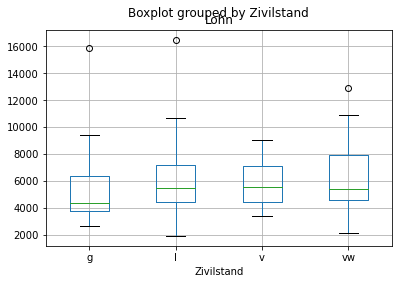

In [116]:
dflohn.boxplot(by='Zivilstand', column='Lohn')

In der folgenden Zelle werden die Dummie-Variablen (nicht permanent) dem Dataframe hinzugefügt. Die ursprüngliche Variable (`Zivilstand`) wird entfernt.

In [117]:
pd.get_dummies(dflohn, columns=['Zivilstand']).head()

,Lohn,Geschlecht,Alter,Zivilstand_g,Zivilstand_l,Zivilstand_v,Zivilstand_vw
Person,,,,,,,
1,4107.0,Mann,40,1,0,0,0
2,5454.0,Mann,47,0,0,0,1
3,3719.0,Mann,41,1,0,0,0
4,6194.0,Mann,18,0,0,1,0
5,NaN,Mann,27,0,0,1,0


## Manipulation von Strings
Python ist eine mächtige Sprache im Umgang mit Zeichenketten (Strings).

### Methoden für Strings

Strings können mit der Methode `split` in eine Liste separiert werden.

In [118]:
text = 'dies ist ein Test'
text.split(' ')  # bei Leerschlag trennen

['dies', 'ist', 'ein', 'Test']

In [119]:
text.split()     # Trennung bei Leerschlag ist der Default!

['dies', 'ist', 'ein', 'Test']

In [120]:
a, b, c, d = text.split()
print(a)
print(d)

dies
Test


Strings zusammenfügen (concatenate):

In [121]:
b + ' ' + a + ' ' + c + ' ' + d

'ist dies ein Test'

In [122]:
# Mit join() geht es eleganter:
' '.join([b, a, c, d])

'ist dies ein Test'

Strings in Gross- oder Kleinbuchstaben umwandeln:

In [123]:
text.upper()    # alles in Grossbuchstaben

'DIES IST EIN TEST'

In [124]:
text.lower()    # alles in Kleinbuchstaben

'dies ist ein test'

In [125]:
text.title()    # jedes Wort mit Grossbuchstaben beginnen

'Dies Ist Ein Test'

Andere Methoden befassen sich mit der Ortung von Teilstrings:

In [126]:
'ei' in text    # True, da "ei" in "ein" enthalten ist.

True

In [127]:
'test' in text  # Case-sensitiv

False

In [128]:
'test' in text.lower()  # Test kleingeschrieben ist in text

True

In [129]:
text.find('s')  # Index des ersten Auftretens von s.

3

In [130]:
text.find('c')  # -1, falls nicht vorhanden.

-1

In [131]:
text.count('i') # wie viele i sind in text

3

In [132]:
text.startswith('dies')

True

In [133]:
text.endswith('.')

False

Mit `replace` können wir einen String mit einem anderen ersetzen:

In [134]:
text

'dies ist ein Test'

In [135]:
text.replace('dies', 'das')

'das ist ein Test'

In [136]:
# replace kann auch zum Löschen verwendet werden:
'Py th  on'.replace(' ', '')

'Python'

Eleganter können Leerschläge (und Zeilenumbrüche) mit `strip` beseitigt werden.

In [137]:
'  dies ist noch ein Test.  \n'.strip()

'dies ist noch ein Test.'

**Kontrollfragen:**

In [138]:
# Gegeben:
text

'dies ist ein Test'

In [139]:
# Frage 1: Was ist der Output?
text.split()[2]

'ein'

In [140]:
# Frage 2: Was ist der Output?
text.upper().count('T')

3

### Vektorisierte String-Methoden in Pandas
- Das Bereinigen eines unordentlichen Datasets für die Analyse erfordert oft viel String-Munging und -Regularisierung. 
- Um die Sache zu komplizieren, fehlen in einer Spalte mit Strings manchmal Daten:

In [141]:
# Beispieldaten:
data = {'Tom': 'tom121@yahoo.com', 'Anna': 'Anna.Müller@gmail.com',
        'Robert': 'robert_bucher@yahoo.de', 'Wes': np.nan, 'Wanda': 'WandaWu@mail.ch'}
ser = pd.Series(data)
ser

Tom             tom121@yahoo.com
Anna       Anna.Müller@gmail.com
Robert    robert_bucher@yahoo.de
Wes                          NaN
Wanda            WandaWu@mail.ch
dtype: object

In [142]:
ser.isnull()

Tom       False
Anna      False
Robert    False
Wes        True
Wanda     False
dtype: bool

- Series verfügen über Array-basierte Methoden für *String-Operationen, die NA-Werte überspringen*. 
- Auf diese wird mittels **`str`-Attribut der Series** zugegriffen. 
- Im ersten Beispiel werden *je* die letzten drei Zeichen aus den Zeichenketten der Series gewählt. 

In [149]:
ser.str[-3:]  # Letzte drei Buchstaben in Email-Adressen

Tom       com
Anna      com
Robert    .de
Wes       NaN
Wanda     .ch
dtype: object

Betrachten wir weitere Beispiele:

In [150]:
# Länge der Strings in einer Series ermitteln:
ser.str.len()

Tom       16.0
Anna      21.0
Robert    22.0
Wes        NaN
Wanda     15.0
dtype: float64

In [151]:
# Prüfen, ob eine Zeichenkette (hier 'yahoo') im String enthalten ist:
ser.str.contains('yahoo') 

Tom        True
Anna      False
Robert     True
Wes         NaN
Wanda     False
dtype: object

In [152]:
# Prüfen, ob Zeichenketten in Series mit bestimmtem Ausdruck enden:
ser.str.endswith('.de')
# startswith() funktioniert entsprechend.

Tom       False
Anna      False
Robert     True
Wes         NaN
Wanda     False
dtype: object

In [153]:
# Strings in Kleinbuchstaben umwandeln:
ser.str.lower()   # .upper() für Grossbuchstaben

Tom             tom121@yahoo.com
Anna       anna.müller@gmail.com
Robert    robert_bucher@yahoo.de
Wes                          NaN
Wanda            wandawu@mail.ch
dtype: object

In [158]:
# Suchen und ersetzen:
ser.str.replace('.de', '.com')

C:\Users\danie\AppData\Local\Temp/ipykernel_25052/452902811.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ser.str.replace('.de', '.com')


Tom              tom121@yahoo.com
Anna        Anna.Müller@gmail.com
Robert    robert_bucher@yahoo.com
Wes                           NaN
Wanda             WandaWu@mail.ch
dtype: object

In [159]:
# Die Änderung mit replace ist nicht permanent:
ser

Tom              tom121@yahoo.com
Anna        Anna.Müller@gmail.com
Robert    robert_bucher@yahoo.com
Wes                           NaN
Wanda             WandaWu@mail.ch
dtype: object

In [160]:
ser = ser.str.replace('.de', '.com')
ser   # jetzt permanent

C:\Users\danie\AppData\Local\Temp/ipykernel_25052/3242468281.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ser = ser.str.replace('.de', '.com')


Tom              tom121@yahoo.com
Anna        Anna.Müller@gmail.com
Robert    robert_bucher@yahoo.com
Wes                           NaN
Wanda             WandaWu@mail.ch
dtype: object

In [161]:
# An welcher Position steht je das erste mal der String 'om'.
ser.str.find('om')
# Falls der String nicht vorkommt, wird -1 zurückgegeben.

Tom        1.0
Anna      19.0
Robert    21.0
Wes        NaN
Wanda     -1.0
dtype: float64

Eine weitere sehr nützliche Methode ist `split`:

In [162]:
# Eine weitere sehr nützliche Methode:
ser.str.split('@')

Tom              [tom121, yahoo.com]
Anna        [Anna.Müller, gmail.com]
Robert    [robert_bucher, yahoo.com]
Wes                              NaN
Wanda             [WandaWu, mail.ch]
dtype: object

Man kann auch mehrfach `str` verwenden:

In [163]:
# Wie oft kommt der Buchstabe "a" bzw. "A" je vor?
ser.str.lower().str.count('a')

Tom       1.0
Anna      3.0
Robert    1.0
Wes       NaN
Wanda     3.0
dtype: float64

**Kontrollfrage:**

In [164]:
# Gegeben:
np.random.seed(43)
df = pd.read_csv('../weitere_Daten/College.csv', 
                      index_col=0, usecols=range(5)).sample(5)
df

,Private,Apps,Accept,Enroll
College,,,,
Tiffin University,Yes,845,734,254
Ohio Northern University,Yes,2936,2342,669
Nazareth College of Rochester,Yes,947,798,266
Columbia University,Yes,6756,1930,871
University of Vermont,No,7663,6008,1735


In [165]:
# Frage 1: Was ist der Output?
df.index.str.endswith('University')

array([ True,  True, False,  True, False])

In [166]:
# Frage 2: Was ist der Output?
df.index.str.lower().str.contains('uni')

array([ True,  True, False,  True,  True])

In [167]:
# Frage 3: Was ist der Output?
df.index.str.lower().str.contains('uni').sum()

4

## Fazit
- Eine effektive Aufbereitung der Daten kann die Produktivität erheblich steigern, da dadurch mehr Zeit für die Analyse von Daten zur Verfügung steht. 
- Wir haben in diesem Kapitel eine Reihe von Werkzeugen untersucht, aber die Abdeckung ist hier keineswegs umfassend. 
- Im nächsten Kapitel werden wir Pandas-Funktionalitäten zum Umformen und Verknüpfen von Datensätzen kennenlernen.